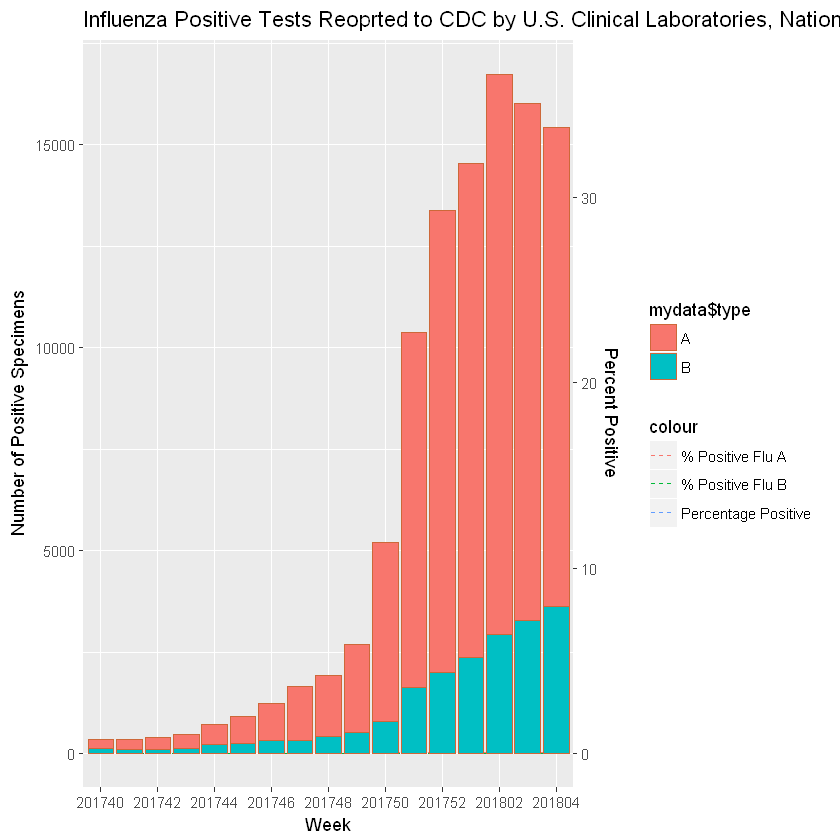

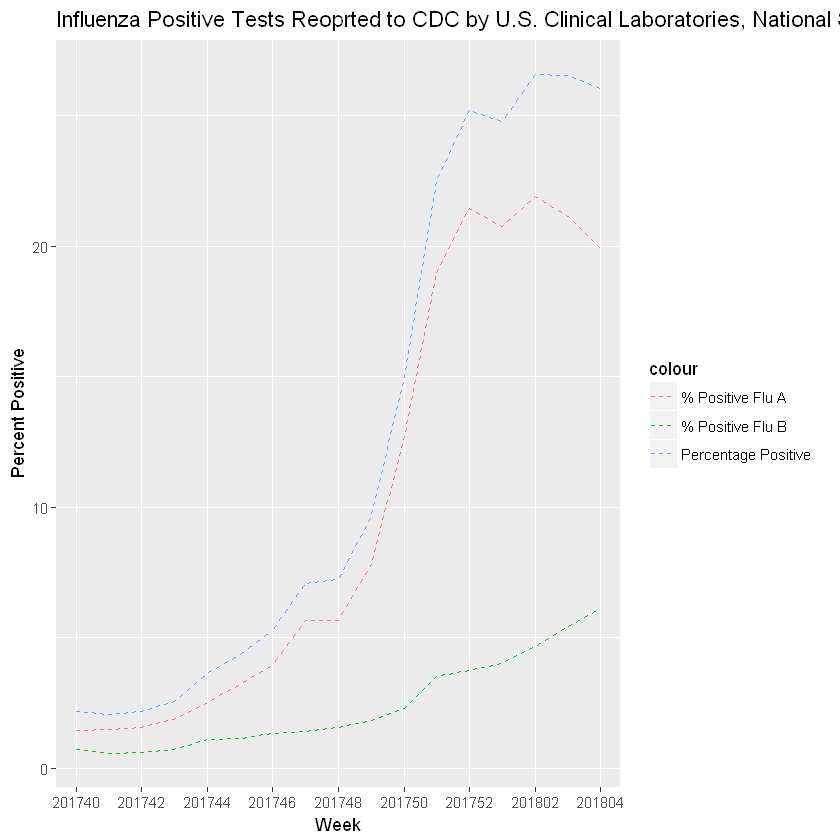

In [18]:
# Influenza National Summary
virus_data <- read.csv('F:/UB/Sem 2/CSE 587 - Data Intensive Computing/Lab 1/Data/Influenza Positive Tests Reported to CDC.csv')
virus_data$Week <- as.factor(virus_data$Week)
weeks <-rep(virus_data$Week, 2)
values <-c(virus_data$Total.A, virus_data$Total.B)
percentA <- c(virus_data$Percent.Positive.A)
percentB <- c(virus_data$Percent.Positive.B)
total <- percentA+percentB
type <-c(rep("A", length(virus_data$Total.A)), 
         rep("B", length(virus_data$Total.A))
        )

mydata <-data.frame(weeks, values, type, percentA, percentB, total)

p <-ggplot(mydata, aes(x = mydata$weeks)) + scale_x_discrete(breaks = c("201740", "201742", "201744", "201746", "201748", "201750", "201752", "201802", "201804"))
p <- p + geom_line(aes(y = mydata$total, colour = "Percentage Positive", group = "Total"),stat="identity", linetype = "dashed")
p <- p + geom_line(aes(y = mydata$percentA, colour = "% Positive Flu A", group = "PercentA"),stat="identity", linetype = "dashed")
p <- p + geom_line(aes(y = mydata$percentB, colour = "% Positive Flu B", group = "PercentB"),stat="identity", linetype = "dashed")
p <- p + labs(title = "Influenza Positive Tests Reoprted to CDC by U.S. Clinical Laboratories, National Summary, 2017-2018 Season" , x = "Week" , y = "Number of Positive Specimens")
p + geom_bar(aes(y=mydata$values, fill = mydata$type),stat="identity", colour="sienna3")+
    scale_y_continuous(sec.axis = sec_axis(~.*30/(max(mydata$values)-min(mydata$values)), name = "Percent Positive"))

q <-ggplot(mydata, aes(x = mydata$weeks)) + scale_x_discrete(breaks = c("201740", "201742", "201744", "201746", "201748", "201750", "201752", "201802", "201804"))
q <- q + geom_line(aes(y = mydata$percentA, group = "PercentA", colour = "% Positive Flu A"), linetype = "dashed")
q <- q + geom_line(aes(y = mydata$percentB, group = "PercentB", colour = "% Positive Flu B"), linetype = "dashed")
q <- q + geom_line(aes(y = mydata$total, group = "Total", colour = "Percentage Positive"), linetype = "dashed")
q <- q + labs(title = "Influenza Positive Tests Reoprted to CDC by U.S. Clinical Laboratories, National Summary, 2017-2018 Season" , x = "Week" , y = "Percent Positive")
q

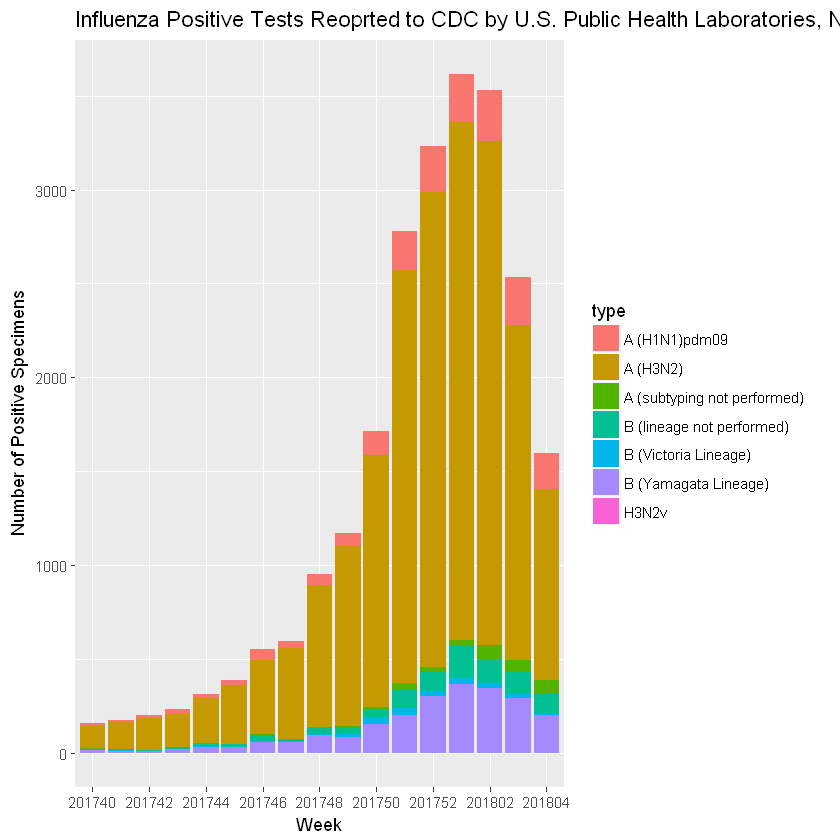

In [21]:
# Positive Tested
virus_data_public_labs <- read.csv('F:/UB/Sem 2/CSE 587 - Data Intensive Computing/Lab 1/Data/Public Labs.csv')
virus_data_public_labs$Week <- as.factor(virus_data$Week)

weeks <-rep(virus_data$Week, 7)
values <-c(virus_data_public_labs$A.Subtyping.not.performed., 
           virus_data_public_labs$A..H1N1.pdm09, 
           virus_data_public_labs$A.H3., 
           virus_data_public_labs$A.H3N2v., 
           virus_data_public_labs$B, 
           virus_data_public_labs$BVIC, 
           virus_data_public_labs$BYAM)
type <-c(rep("A (subtyping not performed)", length(virus_data_public_labs$A.Subtyping.not.performed.)), 
         rep("A (H1N1)pdm09", length(virus_data_public_labs$A..H1N1.pdm09)),
         rep("A (H3N2)", length(virus_data_public_labs$A.H3.)),
         rep("H3N2v", length(virus_data_public_labs$A.H3N2v.)),
         rep("B (lineage not performed)", length(virus_data_public_labs$B)),
         rep("B (Victoria Lineage)", length(virus_data_public_labs$BVIC)),
         rep("B (Yamagata Lineage)", length(virus_data_public_labs$BYAM))
        )

mydata2 <-data.frame(weeks, values, type)

p <-ggplot(mydata2, aes(weeks, values))
p <- p + geom_bar(stat = "identity", aes(fill = type)) + scale_x_discrete(breaks = c("201740", "201742", "201744", "201746", "201748", "201750", "201752", "201802", "201804"))
p + labs(title = "Influenza Positive Tests Reoprted to CDC by U.S. Public Health Laboratories, National Summary, 2017-2018 Season" , x = "Week" , y = "Number of Positive Specimens")

Warning message:
"package 'plotrix' was built under R version 3.4.3"

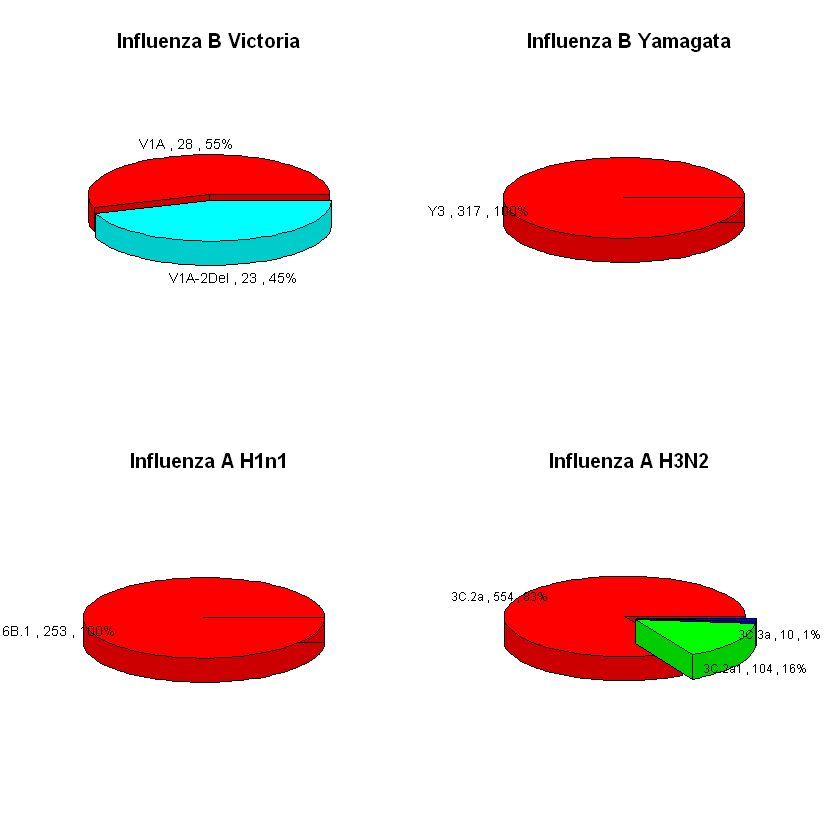

In [5]:
# Pie chart
library(plotrix)

data_frame = read.csv("F:\\UB\\Sem 2\\CSE 587 - Data Intensive Computing\\Lab 1\\Part 2\\data\\Genetic04.csv")

data_Victoria <- data_frame[1:2 ,  ]
data_Yamagata <- data_frame[3 , ]
data_InfluenzaA_H1 <- data_frame[6 ,  ]
data_InfluenzaA_H3 <- data_frame[9:11 ,  ]

par(mfrow = c(2,2))
pie3D(data_Victoria$Number, labels = paste(data_Victoria$Genetic_Group,",",data_Victoria$Number,",",data_Victoria$X..of..Sub.type.Total) , labelcex = 0.7 , main = "Influenza B Victoria", explode=0.05)
pie3D(data_Yamagata$Number, labels = paste(data_Yamagata$Genetic_Group,",",data_Yamagata$Number,",",data_Yamagata$X..of..Sub.type.Total) , labelcex =0.7 , main = "Influenza B Yamagata", explode=0.05)
pie3D(data_InfluenzaA_H1$Number, labels = paste(data_InfluenzaA_H1$Genetic_Group,",",data_InfluenzaA_H1$Number,",",data_InfluenzaA_H1$X..of..Sub.type.Total) , labelcex = 0.7 , main = "Influenza A H1n1", explode=0.05)
pie3D(data_InfluenzaA_H3$Number, labels = paste(data_InfluenzaA_H3$Genetic_Group,",",data_InfluenzaA_H3$Number,",",data_InfluenzaA_H3$X..of..Sub.type.Total) , labelcex = 0.6 ,main = "Influenza A H3N2", explode=0.05)

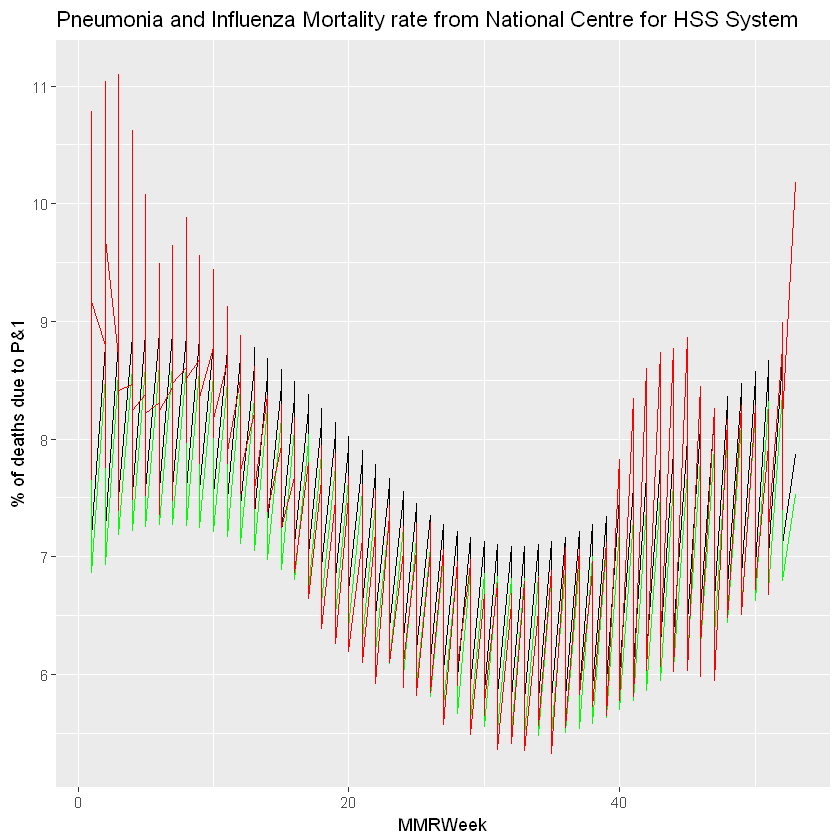

In [7]:
# Time series data for Influenza and Pneumonia Deaths per year
library(ggplot2)
data_frame = read.csv("F:\\UB\\Sem 2\\CSE 587 - Data Intensive Computing\\Lab 1\\Part 2\\data\\NCHSData04.csv")
ggplot(data_frame, aes(data_frame$Week) ) +                    # basic graphical object
  geom_line(aes(y=data_frame$Threshold), colour="black") +  # first layer
  geom_line(aes(y=data_frame$Expected), colour="green") +
  geom_line(aes(y=(data_frame$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza)) , colour="red") +
  labs(title = "Pneumonia and Influenza Mortality rate from National Centre for HSS System" , x = "MMRWeek" , y = "% of deaths due to P&1")

[1] 15542    13

Warning message:
"Ignoring unknown aesthetics: x, y"Warning message:
"Ignoring unknown aesthetics: x, y"

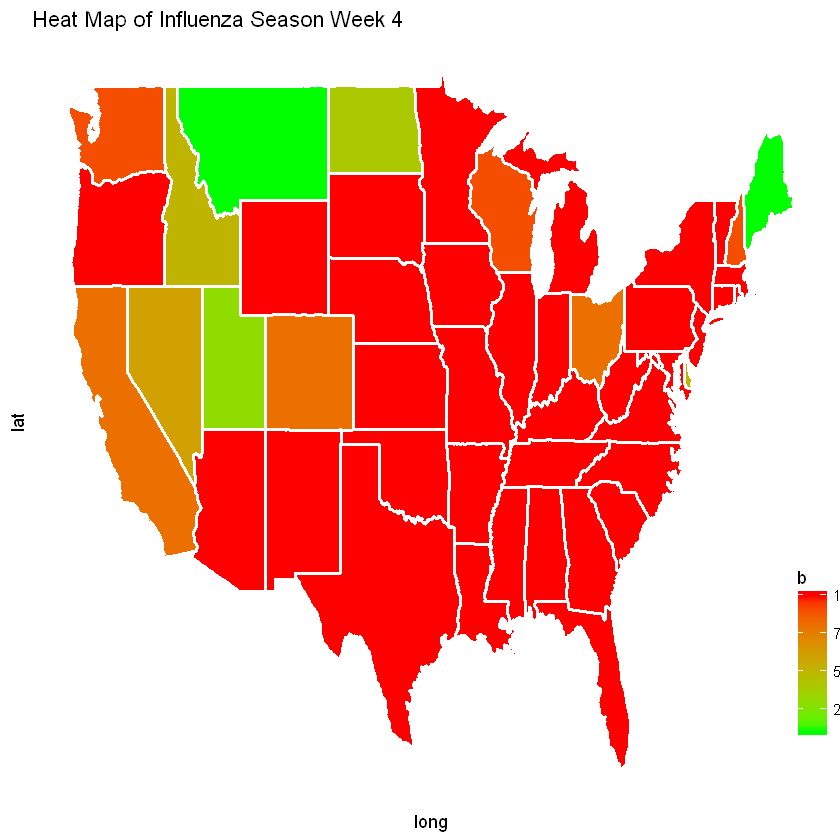

In [22]:
# Heatmap
library(ggmap)
library(maps)
library(plyr)
library(RColorBrewer)
data_frame = read.csv("F:\\UB\\Sem 2\\CSE 587 - Data Intensive Computing\\Lab 1\\Part 2\\data\\StateDataforMap_2017-18week4.csv")
data_frame$STATENAME <- (tolower(data_frame$STATENAME))
all_states <- map_data("state")
names(all_states)[5] <- "STATENAME"

total <- merge(all_states , data_frame ,  by = intersect(names(all_states), names(data_frame)) , all= TRUE )
names(total)[1] <- "region"
names(all_states)[5] <- "region"
b<-toString(total$ACTIVITY.LEVEL)
b<- unlist(strsplit(b,','))

b<-substr(b,nchar(b)-1, nchar(b))
b<-as.numeric(b)

dim(total)
# name="legend" ,  midpoint=8, low = "red", mid="white" , high = "blue" , space="Lab", guide="colourbar"
p <- ggplot()
hm.palette <- colorRampPalette(rev(brewer.pal(11, 'Spectral')), space='Lab')
p <- p + geom_map(data=map_data("state") , map=map_data("state") , aes(long, lat, map_id=region) , color="black" ,fill=NA , size=1)
p <- p + geom_map(data=total, map = map_data("state"), aes(long , lat , map_id=region , fill=b)  ,color="white", size=1 ) + 
    scale_fill_gradient(low="green" , high="red")
   
P1 <- p + theme_bw()  + labs(title = "Heat Map of Influenza Season Week 4")
P1 <- P1 + theme(legend.position=c(1, 0.2))
P1 + scale_y_continuous(breaks=c()) + scale_x_continuous(breaks=c()) + theme(panel.border =  element_blank())